## Phase 1: Data Engineering

In [26]:
import pandas as pd
df = pd.read_csv("./House-Price-Data.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1. Is the SalePrice column normally distributed or not?

Back up your answer with a statistical test. Make sure you provide your interpretation of its results.

**Normal distribution**
- Mean ~=median
- 68% of the data lies within one standard deviation of the mean
- 95% lies within two standard deviations
- Symmetry around the mean
- 50% of values are to the right of the mean (i.e. > the mean), 50% are to the left of the mean (i.e. < the mean)

Basic Statistics:
- Mean: $180,921.20
- Median: $163,000.00
- Std Dev: $79,442.50


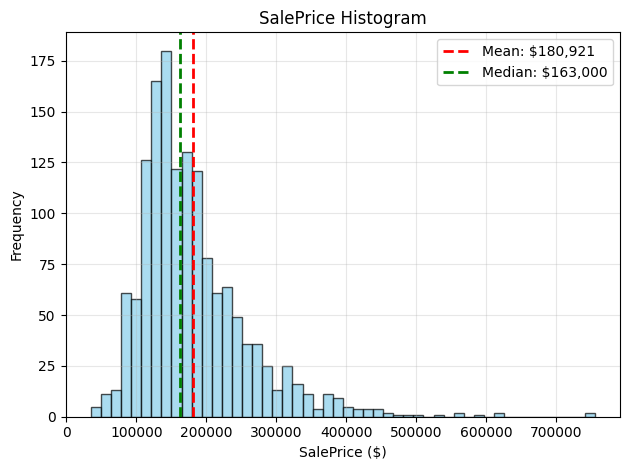

In [29]:
import matplotlib.pyplot as plt

mean = df['SalePrice'].mean()
median = df['SalePrice'].median()
std = df['SalePrice'].std()
print(f"Basic Statistics:")
print(f"- Mean: ${mean:,.2f}")
print(f"- Median: ${median:,.2f}")
print(f"- Std Dev: ${std:,.2f}")

plt.hist(df['SalePrice'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean:,.0f}')
plt.axvline(median, color='green', linestyle='--', linewidth=2, label=f'Median: ${median:,.0f}')
plt.xlabel('SalePrice ($)')
plt.ylabel('Frequency')
plt.title('SalePrice Histogram')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [31]:
print(f"Mean-Median difference: ${(abs(mean - median) / median)*100:,.2f}%")

Mean-Median difference: $10.99%


The 11% difference between mean and median indicates skewness. In a perfectly normal distribution, mean equals median. This deviation, combined with the visual right tail in the histogram, confirms the distribution is not perfectly symmetric.

In [27]:
# 68% within 1 std, 95% within 2 std
within_1std = df[(df['SalePrice'] >= mean - std) & (df['SalePrice'] <= mean + std)]
pct_1std = (len(within_1std) / len(df)) * 100

within_2std = df[(df['SalePrice'] >= mean - 2*std) & (df['SalePrice'] <= mean + 2*std)]
pct_2std = (len(within_2std) / len(df)) * 100

print(f"Data within 1 std dev of mean: {pct_1std:.2f}% {abs(pct_1std-68):.2f}% diff")
print(f"Data within 2 std dev of mean: {pct_2std:.2f}% {abs(pct_2std-95):.2f}% diff")

Data within 1 std dev of mean: 78.42% 10.42% diff
Data within 2 std dev of mean: 95.68% 0.68% diff


78.42% of the data lies within 1 standard deviation (Expected: 68%). The difference of 10.42% is acceptable for real-world data. 95.68% lies within 2 standard deviations (Expected: 95%), which is nearly perfect. Overall, the 68-95 rule is approximately satisfied.

In [25]:
# Symmetry
left_of_mean = df[df['SalePrice'] < mean]
right_of_mean = df[df['SalePrice'] >= mean]

pct_left = (len(left_of_mean) / len(df)) * 100
pct_right = (len(right_of_mean) / len(df)) * 100

print(f"Values < mean: {pct_left:.2f}%")
print(f"Values ≥ mean: {pct_right:.2f}% ")

Values < mean: 61.64%
Values ≥ mean: 38.36% 


61.64% of values are below the mean and 38.36% are above. This imbalance indicates the distribution is right-skewed (longer tail on the right side), confirming non-symmetry.

#### Final Conclusion

Based on all criteria analyzed:
- Mean ≈ Median: Shows slight difference (11% gap) - suggests some skewness
- 68-95 Rule: Approximately satisfied (78% and 96%)
- Symmetry: 61-39 split indicates right skew
- Histogram: Bell-shaped but with right tail visible

SalePrice is approximately normally distributed with slight right skewness.  
Because the sample size (n=1460) is significantly larger than 30, the Central Limit Theorem implies that the sampling distribution of the mean will be approximately normal even if the underlying data is moderately skewed. This robustness allows for the use of parametric tests like t-tests and ANOVA without strict adherence to the normality assumption (Lumley et al., 2002).